## Plant Classification MVP

This project involves using neural networks and transfer learning to classify leaves by plant type. There are 11 classes total. 

This notebook outlines initial modeling. A simple baseline neural network will be built.

In [16]:
#transfer learning model
from tensorflow import keras
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False)

58900480/58889256 [==============================] - 4s 0us/step


In [83]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/mehikapatel/Plant_NN_Project/data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,11))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [84]:
train_features, train_labels = extract_features(train_dir, 1592)

Found 1592 images belonging to 11 classes.


In [85]:
validation_features, validation_labels = extract_features(validation_dir, 341) 

Found 341 images belonging to 11 classes.


In [86]:
test_features, test_labels = extract_features(test_dir, 344) 

Found 344 images belonging to 11 classes.


In [87]:
#flatten images:

train_features = np.reshape(train_features, (1592, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (341, 4 * 4 * 512))
test_features = np.reshape(test_features, (344, 4 * 4 * 512))

In [89]:
# train on recorded data/labels:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=64,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
25/25 [==============================] - 2s 31ms/step - loss: 2.7261 - acc: 0.0942 - val_loss: 2.1931 - val_acc: 0.3372
Epoch 2/30
25/25 [==============================] - 0s 18ms/step - loss: 2.3814 - acc: 0.1451 - val_loss: 2.0904 - val_acc: 0.4487
Epoch 3/30
25/25 [==============================] - 0s 17ms/step - loss: 2.2126 - acc: 0.2114 - val_loss: 1.9696 - val_acc: 0.5044
Epoch 4/30
25/25 [==============================] - 0s 17ms/step - loss: 2.1025 - acc: 0.2609 - val_loss: 1.8558 - val_acc: 0.5484
Epoch 5/30
25/25 [==============================] - 0s 17ms/step - loss: 2.0139 - acc: 0.3265 - val_loss: 1.7662 - val_acc: 0.5806
Epoch 6/30
25/25 [==============================] - 0s 18ms/step - loss: 1.9387 - acc: 0.3310 - val_loss: 1.6894 - val_acc: 0.5806
Epoch 7/30
25/25 [==============================] - 0s 18ms/step - loss: 1.8871 - acc: 0.3770 - val_loss: 1.6092 - val_acc: 0.6158
Epoch 8/30
25/25 [==============================] - 0s 18ms/step - loss: 1.8053 - a

In [99]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               25700     
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 11)                1111      
Total params: 2,124,219
Trainable params: 2,124,219
Non-trainable params: 0
_________________________________________________________________


In [100]:
from sklearn import metrics
y_pred = model.predict(test_features)
def benchmark(model):
    y_pred = model.predict(test_features)

    print(f"mae: {metrics.mean_absolute_error(test_labels, y_pred):,.2f}")
    print(f"mse: {metrics.mean_squared_error(test_labels, y_pred):,.2f}")


In [104]:
val_loss, val_acc = model.evaluate(validation_features, validation_labels)
print(f'\n\nValidation Accuracy: {val_acc}')

11/11 [==============================] - 0s 5ms/step - loss: 0.8440 - acc: 0.7859


Validation Accuracy: 0.7859237790107727


We have a final accuracy of .785 on validation data.

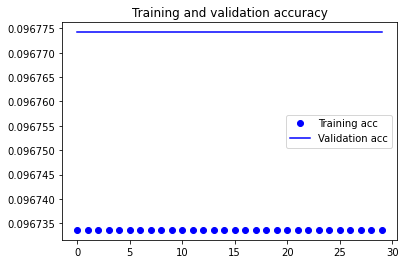

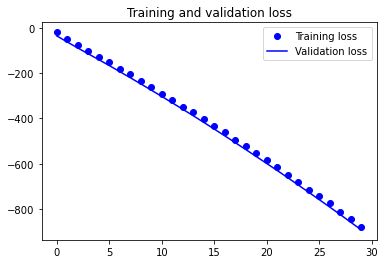

In [102]:
# #loss and accuracy curves during training;
# import matplotlib.pyplot as plt

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()